# Project: Analysis of Gun Quantities Alongside Population

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project investigates a US census dataset together with an FBI dataset keeping track of guns and gun permits by state.  I chose the census and FBI data for analysis because I'm interested in the different ways that demographics impact lifestyle.  The census data allowed me to determine how certain population characteristics varied by state and compare that to the number of gun permits in the same state for the same year.  I graphed the population percentage of seniors versus the number of permits for each state in 2016, and I graphed the population per square mile versus the number of permits for each state in 2010.  The census dataset I used contained the seniors information for 2016 and the population per square mile information for 2010, so I looked at a different year for each questions that I asked.

In [2]:
#imports packages to supplement python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#gives me more options for the appearance of my plots
import seaborn as sns
sns.set_style('darkgrid')
# makes my plots visible in the notebook
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Here I load the data, check its properties, and decide what needs to change before it can be neatly analyzed.  Under Data Cleaning, I will make those changes before I proceed to asking questions about the data.

### General Properties

In [3]:
df_census = pd.read_csv('u.s.-census-data.csv')# loads census data
#df_guns = pd.read_csv('gun-data_excel.csv', index_col='month')# Loads FBI data
df_guns = pd.read_csv('gun-data_excel.csv') #Loads FBI data
df_guns.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
#display first five lines of census data
df_census.head();

In [5]:
#check numbers of non-null values in the FBI dataset
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [6]:
# check numbers of non-null values in census dataset
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [7]:
# display number of rows, columns
df_guns.shape

(12485, 27)

In [8]:
df_census.shape

(85, 52)

In [9]:
# display number of duplicate rows
sum(df_guns.duplicated())

0

In [10]:
sum(df_census.duplicated())

3

### Data Cleaning

Now that I have loaded and examined some basic properties for each of the two datasets that I will be using, I will make changes to the dataframes to make them cleaner and more concise for my project.  

Changes will have to be made before I can combine the two dataframes into one, which will make graphing more straightforward.  The two datasets handle time differently.  The FBI data uses a month at a time, while the census data uses a year at a time.  All of the data for a given state in each month of 2016 and 2010 in the FBI dataset has to be summed to create two new columns in the census dataset: 'total gun registrations in 2010' and 'total gun registrations in 2016'.  I will use query and groupby to add the values for each given state in 2016 together and then did the same for 2010.

The census data has the states as columns whereas the FBI data has a row for each state, so the rows and columns have to be inverted in the census data before it can be combined with the FBI data.  To make the data cleaner, some columns will need to be removed, while others need their names shortened.

In [11]:
# change the datatype that the FBI dataset uses for the column that records time
df_guns['month'] = pd.to_datetime(df_guns['month'])
df_guns.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null datetime64[ns]
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_

Most of the columns in the FBI dataset had many null values, but I did not need those columns to answer my research questions, so I discarded those columns.

In [12]:
# trim unnecessary columns
df_guns.drop(['handgun', 'long_gun', 'other', 'returned_handgun', 'returned_long_gun', 'returned_other', 'totals', 'permit_recheck', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other', 'multiple', 'redemption_handgun', 'redemption_long_gun', 'redemption_other'], axis=1, inplace = True)
df_guns.head()

,month,state,permit
0,2017-09-01,Alabama,16717.0
1,2017-09-01,Alaska,209.0
2,2017-09-01,Arizona,5069.0
3,2017-09-01,Arkansas,2935.0
4,2017-09-01,California,57839.0


The FBI and census datasets have time divided up into different increments, so I need to get all of the relevant FBI data for 2016 and 2010, respectively, into two new columns.  I will make them into new dataframes to isolate those years, then use groupby to lump the data for all of the months that year together for each state.

In [13]:
# isolate the 2016 data in its own dataframe
sixteen = df_guns.loc[495:1154, :]
sixteen.head()

,month,state,permit
495,2016-12-01,Alabama,26996.0
496,2016-12-01,Alaska,254.0
497,2016-12-01,Arizona,8900.0
498,2016-12-01,Arkansas,3294.0
499,2016-12-01,California,61808.0


In [14]:
# isolate the 2010 data in its own dataframe
ten = df_guns.loc[4455:5114, :]
ten.head()

,month,state,permit
4455,2010-12-01,Alabama,413.0
4456,2010-12-01,Alaska,0.0
4457,2010-12-01,Arizona,2082.0
4458,2010-12-01,Arkansas,2582.0
4459,2010-12-01,California,24901.0


In [15]:
# make new dataframe
df_s = sixteen.groupby('state').sum()
df_s.head(55);

In [16]:
# make a new dataframe
df_t = ten.groupby('state').sum()
df_t.head(55);

Now that the data is grouped in a way that is compatible with the census data, I will combine the 2010 and 2016 dataframe back into one dataframe for the sake of clarity before adding them to the census dataframe.

In [17]:
# give the new dataframe a better name
df_FBI = df_t

In [18]:
# rename column
df_FBI['permits in 2016'] = df_t['permit']

In [19]:
# rename column
df_FBI['permits in 2010'] = df_s['permit']

In [20]:
# get rid of the first permit column since we have a copy of it with the name that we want
df_FBI.drop(['permit'], axis=1, inplace=True)

For this project, I am only interested in the 50 states of the US.  There were locations--such as US territories--in the FBI data that were not in the census data, so those rows were removed from the FBI data.

In [21]:
# drop rows for locations in the FBI data that are not in the census data
df_FBI.drop(['Virgin Islands', 'District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico'], axis=0, inplace=True)

The census data also needs irrelevant information dropped and the columns and rows reversed, since putting the states in the rows will be compatible with the FBI data and will be a more intuitive layout for the data.

In [22]:
# drop the Fact Note column from the census dataframe, since it is not relevant to the project
df_census.drop(['Fact Note'], axis=1, inplace=True)
df_census.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [23]:
# Move the state names from the column headers to the furst row
df_census_transposed = df_census.T
df_census_transposed.head();

In [24]:
# Drop the unnecessary columns
df_census_transposed.drop([1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84], axis = 1, inplace=True)
df_census_transposed.head()

,0,8,62
Fact,"Population estimates, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2...","Population per square mile, 2010"
Alabama,"4,863,300",16.10%,94.4
Alaska,"741,894",10.40%,1.2
Arizona,"6,931,071",16.90%,56.3
Arkansas,"2,988,248",16.30%,56


Most of the census data columns were not needed for my analysis, so I removed the extras.  Before I can combine the census and FBI data, I still need to make a header of column labels out of the first row of the census data. The columns I kept had long names that were no longer necessary to distinguish them from other columns with similar names, so I will rename those columns.

In [25]:
#save the transposed dataset to a new csv file so that I can specify the second row as the header in the read_csv function
df_census_transposed.to_csv('us_census_data_transposed.csv')

In [26]:
#open and make the first row the header
df_new_census = pd.read_csv('us_census_data_transposed.csv', header=1)
df_new_census.head()

,Fact,"Population estimates, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Population per square mile, 2010"
0,Alabama,"4,863,300",16.10%,94.4
1,Alaska,"741,894",10.40%,1.2
2,Arizona,"6,931,071",16.90%,56.3
3,Arkansas,"2,988,248",16.30%,56
4,California,"39,250,017",13.60%,239.1


In [27]:
#rename first column to 'state' to match 'state' column in df_guns
df_new_census = df_new_census.rename(columns = {'Fact':'state'})
df_new_census.head()

,state,"Population estimates, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Population per square mile, 2010"
0,Alabama,"4,863,300",16.10%,94.4
1,Alaska,"741,894",10.40%,1.2
2,Arizona,"6,931,071",16.90%,56.3
3,Arkansas,"2,988,248",16.30%,56
4,California,"39,250,017",13.60%,239.1


In [28]:
# make state the index so that the FBI data will add on correctly
df_new_census.set_index('state', inplace=True)
df_new_census.head()

,"Population estimates, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Population per square mile, 2010"
state,,,
Alabama,"4,863,300",16.10%,94.4
Alaska,"741,894",10.40%,1.2
Arizona,"6,931,071",16.90%,56.3
Arkansas,"2,988,248",16.30%,56
California,"39,250,017",13.60%,239.1


In [29]:
# shorten column name using rename
df_new_census = df_new_census.rename(columns = {'Population per square mile, 2010':'Pop per sq mi 2010'})
df_new_census.head()

,"Population estimates, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)",Pop per sq mi 2010
state,,,
Alabama,"4,863,300",16.10%,94.4
Alaska,"741,894",10.40%,1.2
Arizona,"6,931,071",16.90%,56.3
Arkansas,"2,988,248",16.30%,56
California,"39,250,017",13.60%,239.1


In [30]:
df_FBI.head()

,permits in 2016,permits in 2010
state,,
Alabama,4621.0,291039.0
Alaska,0.0,3121.0
Arizona,24751.0,87771.0
Arkansas,31305.0,55456.0
California,295252.0,1036981.0


I need to add the two columns with the permit information from the FBI dataframe onto the census dataframe.

In [31]:
# add column to census dataframe
df_new_census['Permits in 2016'] = df_FBI['permits in 2016']
df_new_census.head()

,"Population estimates, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)",Pop per sq mi 2010,Permits in 2016
state,,,,
Alabama,"4,863,300",16.10%,94.4,4621.0
Alaska,"741,894",10.40%,1.2,0.0
Arizona,"6,931,071",16.90%,56.3,24751.0
Arkansas,"2,988,248",16.30%,56,31305.0
California,"39,250,017",13.60%,239.1,295252.0


In [32]:
# add column to census dataframe
df_new_census['Permits in 2010'] = df_FBI['permits in 2010']
df_new_census.head()

,"Population estimates, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)",Pop per sq mi 2010,Permits in 2016,Permits in 2010
state,,,,,
Alabama,"4,863,300",16.10%,94.4,4621.0,291039.0
Alaska,"741,894",10.40%,1.2,0.0,3121.0
Arizona,"6,931,071",16.90%,56.3,24751.0,87771.0
Arkansas,"2,988,248",16.30%,56,31305.0,55456.0
California,"39,250,017",13.60%,239.1,295252.0,1036981.0


In [33]:
# change the index so that state is no longer the index
df_new_census.to_csv('newcensus.csv')
df_new_census = pd.read_csv('newcensus.csv')
df_new_census.head()

,state,"Population estimates, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)",Pop per sq mi 2010,Permits in 2016,Permits in 2010
0,Alabama,"4,863,300",16.10%,94.4,4621.0,291039.0
1,Alaska,"741,894",10.40%,1.2,0.0,3121.0
2,Arizona,"6,931,071",16.90%,56.3,24751.0,87771.0
3,Arkansas,"2,988,248",16.30%,56,31305.0,55456.0
4,California,"39,250,017",13.60%,239.1,295252.0,1036981.0


Now that I have my combined dataframe with just the information I need, I'm going to change the name of the dataframe, change the name of a column, and change the data type of one column to numbers that I can graph.

In [34]:
# shorten name of data frame for less typing later and to reflect the fact that it is no longer just census data
df = df_new_census

In [35]:
# Capitalize label of first column to match others
df = df.rename(columns = {'state':'State'})
df.head(50);

In [36]:
# check what type of data is in each column
df.dtypes

State                                                           object
Population estimates, July 1, 2016,  (V2016)                    object
Persons 65 years and over, percent,  July 1, 2016,  (V2016)     object
Pop per sq mi 2010                                              object
Permits in 2016                                                float64
Permits in 2010                                                float64
dtype: object

In [37]:
#change the datatype of the third column to integer so that I can use it in a graph
#df['Persons 65 years and over, percent,  July 1, 2016,  (V2016)'] = int(df['Persons 65 years and over, percent,  July 1, 2016,  (V2016)'])
#df['Pop per sq mi 2010'] = int(df['Pop per sq mi 2010'])

The line of code directly above did not work, so I am going to try something else.

In [38]:
#make a list from the third column to see whether that returns graphable data
#df['Persons 65 years and over, percent,  July 1, 2016,  (V2016)'] = list(df['Persons 65 years and over, percent,  July 1, 2016,  (V2016)'])
#df['Pop per sq mi 2010'] = list(df['Pop per sq mi 2010'])

That did not work either, so I am going to input the information manually, because the third column doesn't work for graphs in its current form.

*** *** ***I really struggled with this issue of the data being in the wrong form.  I several times thought I had found the way to change the data to a datatype I could graph, but it never worked.  Any insight that anyone could provide in the review would be very much appreciated.  I realize that changing something manually defeats the purpose of coding.

In [39]:
# manually enter values for third column to use in graphs
df['Persons 65 years and over, percent,  July 1, 2016,  (V2016)'] = [16.1, 10.4, 16.9, 16.3, 13.6, 13.4, 16.10, 17.5, 19.9, 13.1, 17.1, 15.1, 14.6, 14.9, 16.4, 15.0, 15.6, 14.4, 19.4, 14.6, 15.8, 16.2, 15.1, 15.1, 16.1, 17.7, 15.0, 15.0, 17.0, 15.3, .165, .154, .155, .145, .162, .150, .168, .174, .165, .167, .160, .157, 12.0, 10.5, 18.1, 14.6, 14.8, 18.8, 16.1, 15.0]
df.head(50);

In [40]:
# manually enter values for third column to use in graphs
df['Pop per sq mi 2010'] = [94.4, 1.2, 56.3, 56, 239.1, 48.5, 738.1, 460.8, 350.6, 168.4, 211.8, 19, 231.1, 181, 54.5, 34.9, 109.9, 104.9, 43.1, 594.8, 839.4, 174.8, 66.6, 63.2, 87.1, 6.8, 23.8, 24.6, 147, 1195.50, 17, 411.2, 196.1, 9.7, 282.3, 54.7, 39.9, 283.9, 1018.1, 153.9, 10.7, 153.9, 96.3, 33.6, 67.9, 202.6, 101.2, 77.1, 105, 5.8]
df.head(50);

In [41]:
# select data that needs to be multiplied by 100 to get percentage
df2 = df.loc[30:41, 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)']

In [42]:
#multiply the selected data by 100
df3 = df2*100
# put the changed data in the table
df.loc[30:41, 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)'] = df3
df.head(50);

The two longest column names are longer than I want to type in my code when making graphs, so I will shorten those.  They did not respond to the column rename function, I assume because of the parentheses, so I will try something different.  

This time, I will make a duplicate column with a different name and drop the original.  It would have been better to have done this earlier and saved myself the typing in this section, but that's done, so it wouldn't save me typing to go back and change it.

In [43]:
# create a new column in the same dataframe with a shortened column label
df['Percent 65 and Over 2016'] = df.loc[0:, 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)']
df.head()

,State,"Population estimates, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)",Pop per sq mi 2010,Permits in 2016,Permits in 2010,Percent 65 and Over 2016
0,Alabama,"4,863,300",16.1,94.4,4621.0,291039.0,16.1
1,Alaska,"741,894",10.4,1.2,0.0,3121.0,10.4
2,Arizona,"6,931,071",16.9,56.3,24751.0,87771.0,16.9
3,Arkansas,"2,988,248",16.3,56.0,31305.0,55456.0,16.3
4,California,"39,250,017",13.6,239.1,295252.0,1036981.0,13.6


In [44]:
# drop the original column with the long name
df.drop(['Persons 65 years and over, percent,  July 1, 2016,  (V2016)'], axis=1, inplace=True)
df.head()

,State,"Population estimates, July 1, 2016, (V2016)",Pop per sq mi 2010,Permits in 2016,Permits in 2010,Percent 65 and Over 2016
0,Alabama,"4,863,300",94.4,4621.0,291039.0,16.1
1,Alaska,"741,894",1.2,0.0,3121.0,10.4
2,Arizona,"6,931,071",56.3,24751.0,87771.0,16.9
3,Arkansas,"2,988,248",56.0,31305.0,55456.0,16.3
4,California,"39,250,017",239.1,295252.0,1036981.0,13.6


In [45]:
# create a new column in the same dataframe with a shortened column label
df['Population 2016'] = df.loc[0:, 'Population estimates, July 1, 2016,  (V2016)']
df.head()

,State,"Population estimates, July 1, 2016, (V2016)",Pop per sq mi 2010,Permits in 2016,Permits in 2010,Percent 65 and Over 2016,Population 2016
0,Alabama,"4,863,300",94.4,4621.0,291039.0,16.1,"4,863,300"
1,Alaska,"741,894",1.2,0.0,3121.0,10.4,"741,894"
2,Arizona,"6,931,071",56.3,24751.0,87771.0,16.9,"6,931,071"
3,Arkansas,"2,988,248",56.0,31305.0,55456.0,16.3,"2,988,248"
4,California,"39,250,017",239.1,295252.0,1036981.0,13.6,"39,250,017"


In [46]:
# drop the original column with the long name
df.drop(['Population estimates, July 1, 2016,  (V2016)'], axis=1, inplace=True)
df.head()

,State,Pop per sq mi 2010,Permits in 2016,Permits in 2010,Percent 65 and Over 2016,Population 2016
0,Alabama,94.4,4621.0,291039.0,16.1,"4,863,300"
1,Alaska,1.2,0.0,3121.0,10.4,"741,894"
2,Arizona,56.3,24751.0,87771.0,16.9,"6,931,071"
3,Arkansas,56.0,31305.0,55456.0,16.3,"2,988,248"
4,California,239.1,295252.0,1036981.0,13.6,"39,250,017"



I now have all of the data that I need in one dataframe.  To save typing, I am calling this newly combined dataframe simply df.  The next step is to put df to the use that I created it for, making graphs using the variables I am interested in.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Does the number of permits vary with the population per square mile?

In [47]:
df.describe()

,Pop per sq mi 2010,Permits in 2016,Permits in 2010,Percent 65 and Over 2016
count,50.000000,5.000000e+01,5.000000e+01,50.000000
mean,194.962000,9.765896e+04,2.226750e+05,15.616000
std,261.091465,3.138832e+05,5.135289e+05,1.832068
min,1.200000,0.000000e+00,0.000000e+00,10.400000
25%,44.450000,1.175000e+01,1.636600e+04,14.925000
50%,98.750000,1.172750e+04,5.692100e+04,15.650000
75%,209.500000,8.158450e+04,2.246940e+05,16.500000
max,1195.500000,2.149338e+06,3.372613e+06,19.900000


The statistics above give an idea of the spread of the data.  The scatter plots below will visually show how two variables, total population per square mile and population proportion seniors, vary by state with respect to the number of permits.

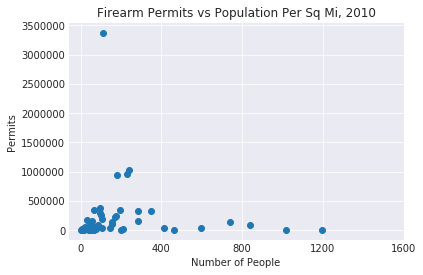

In [48]:
y = df['Permits in 2010'] #sets the data to be used for the y-axis
x = df['Pop per sq mi 2010'] #sets the data to be used for the x-axis
plt.scatter(x,y) #makes a scatter plot
plt.xticks([0, 400, 800, 1200, 1600]) #sets custom x-axis ticks
plt.title('Firearm Permits vs Population Per Sq Mi, 2010') #gives the graph a title
plt.xlabel('Number of People') #labels the x-axis
plt.ylabel('Permits') #labels the y-axis
plt.show() #lets user see the graph

### Research Question 2: Is there any correlation between the number of gun permits for a state and the proportion of inhabitants in the 65 and older age group ?

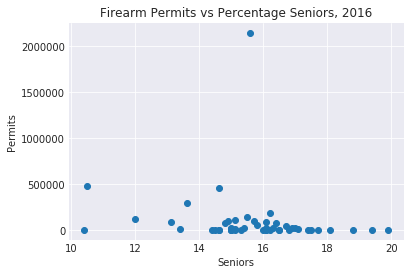

In [49]:
x = df['Percent 65 and Over 2016'] #sets the data to be used for the y-axis
y = df['Permits in 2016'] #sets the data to be used for the x-axis
plt.scatter(x,y) #makes a scatter plot
plt.xticks([10, 12, 14, 16, 18, 20]) #sets custom x-axis ticks
plt.title('Firearm Permits vs Percentage Seniors, 2016')#gives the graph a title
plt.xlabel('Seniors') #labels the x-axis
plt.ylabel('Permits') #labels the y-axis
plt.show() #lets user see the graph

<a id='conclusions'></a>
## Conclusions
Seniors are expressed as a percentage of the population but number of gun permits is used without comparison to the total population of the state.  This is because a person does not have to be a resident of a given state to purchase a gun there and may prefer to purchase a gun in a state that is not their residence, depending on the laws and retail options.  This study does not attempt to address illegal gun purchases, and it only looks at 2016 and 2010.

According to the second graph, permits do not exceed 25,000 in states with more than 400 people per square mile.  However, some states with low populations per square mile have similarly low populations.  A state could also have a low population per square mile but a very dense population if large parts of the state are relatively uninhabited.

In the second graph, there is no strong correlation between number of seniors and number of gun permits, but there are some trends.  The middle fifty percent of the seniors' numbers correspond to much higher overall numbers of permits than the highest and lowest proportions of seniors. Additionally, the four states with the highest percentage of the population for seniors have zero or near-zero permits for 2016.  This is not a strong trend and could be coincidence.  However, states differ in permit requirements for guns.  Since females on average outlive males, one explanation may be that females are more likely to vote for gun control.  This could cause senior citizens to be more likely to move to locations with fewer gun permits, or possibly senior citizens could influence the vote.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0